In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from sklearn import svm

In [5]:
def plotData(X, y, **kwargs):
    '''
    predict the value for the provided linear regression model
    '''
    addBias = kwargs.pop(
        'addBias',
        False)

    Xtemp = X

    if(addBias):
        Xtemp = np.insert(
            Xtemp,
            0,
            np.ones(
                Xtemp.shape[0]),
            axis=1)
    
    X = Xtemp
    Y = y
    positiveExamples = plt.scatter(
                    np.extract(Y == 1, X[:, 1]),
                    np.extract(Y == 1, X[:, 2]),
                    label="y=1",
                    marker='o',
                    color='b',
                    s=10)

    negativeExamples = plt.scatter(
                    np.extract(Y == 0, X[:, 1]),
                    np.extract(Y == 0, X[:, 2]),
                    label="y=0",
                    marker='x',
                    color='r',
                    s=10)

    plt.legend(handles=[positiveExamples, negativeExamples], loc='lower left')

In [6]:
def visualizeBoundary(X, y, svc, h=0.02):

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(
        np.arange(
            x_min,
            x_max,
            h),
        np.arange(
            y_min,
            y_max,
            h))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(
        xx,
        yy,
        Z,
        [0],
        colors='k',
        linewidths=1)

    plotData(X, y, addBias=True)

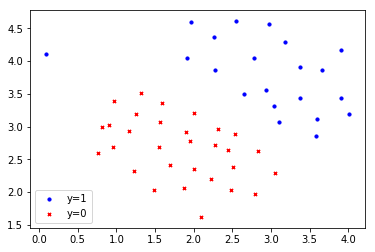

In [7]:
mat = io.loadmat('C:/Users/Windows/Desktop/Python/EX6/ex6data1.mat')

X = mat['X']

y = mat['y'].astype(int).ravel()

plotData(X, y, addBias=True)
plt.show()

In [9]:
def linearKernel(): 
    C = 1
    model = svm.SVC(
            C=1,
            max_iter=100,
            tol=.01,
            kernel='linear')

    model.fit(X, y)
    visualizeBoundary(X, y, model)
    plt.show()

In [11]:
def gaussianKernel(X1, X2, **kwargs):
    sigma = kwargs.pop('sigma', 1)

    if(isinstance(X1, np.ndarray)):
        X1 = X1.flatten()

    if(isinstance(X2, np.ndarray)):
        X2 = X2.flatten()

    euc = np.sum(
        np.power(X1, 2) +
        np.power(X2, 2) -
        (2*X1*X2))

    sim = np.exp(-euc/(2*sigma**2))

    return sim


In [18]:
def gaussTest():
    X1 = np.array([1, 2, 1])
    X2 = np.array([0, 4, -1])
    sim = gaussianKernel(X1, X2, sigma=2)

    print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2. \n{:.6f}'.format(sim))
    print('(for sigma = 2, this value should be about 0.324652)')

In [19]:
gaussTest()

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2. 
0.324652
(for sigma = 2, this value should be about 0.324652)
